Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

Load Breast Cancer Dataset

In [2]:
data = load_breast_cancer()

X = data.data      # Features
y = data.target    # Labels (0 = Malignant, 1 = Benign)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


Train–Test Split (80% Train, 20% Test)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Feature Scaling

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # Fit ONLY on train
X_test_scaled = scaler.transform(X_test)         # Transform test using train stats

Train Logistic Regression Model

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Predictions

In [10]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]   # Probabilities for ROC

Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[41  1]
 [ 1 71]]


Visualization

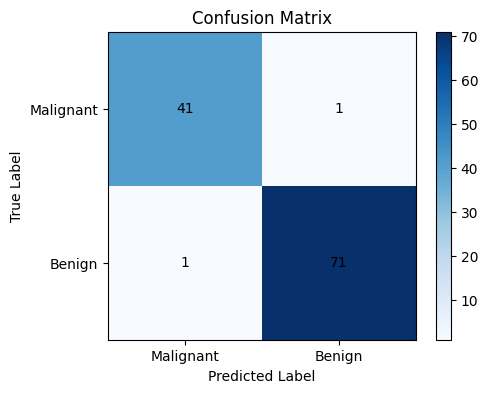

In [12]:
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Malignant", "Benign"])
plt.yticks([0,1], ["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()

Classification Report

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

ROC Curve & AUC Score

AUC Score: 0.9953703703703703


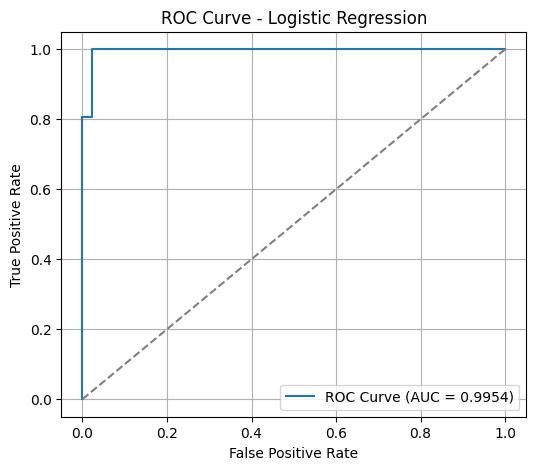

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()